# eCommerce Order Analysis

The appropriate recommendations are dependent on the established KPIs. However, this process will be explored in further iterations of this project, in different notebooks.

This notebook focuses on gathering high-level understanding of the business including but not limited to answering:
* What were the highest-selling products?
* Who were the most loyal customers?
* What are the most profilic traffic sources that lead to conversion?

Order Exploration
We'll start this exploration by investigating products that are most ordered, order frequency and information about the ordering process. Some questions we aim to answer here are:

What was the highest selling product?
How often was this product ordered?
How much revenue did the top products bring in?
Is there a seasonality or trend associated with this product?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
orders = pd.read_csv('/content/drive/MyDrive/2024BusinessAnalysisProject/Data/orders.csv',)

In [3]:
orders.head()

,order_id,user_id,status,gender,created_at,num_of_item
0,4,4,Cancelled,F,2022-03-11 01:32:00+00:00,1
1,15,15,Cancelled,F,2023-05-04 10:00:00+00:00,1
2,51,39,Cancelled,F,2024-11-21 07:35:00+00:00,1
3,64,47,Cancelled,F,2021-01-20 07:20:00+00:00,1
4,90,76,Cancelled,F,2022-11-19 08:04:00+00:00,1


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     10000 non-null  int64 
 1   user_id      10000 non-null  int64 
 2   status       10000 non-null  object
 3   gender       10000 non-null  object
 4   created_at   10000 non-null  object
 5   num_of_item  10000 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 468.9+ KB


In [4]:
orders.isna().sum()

,0
order_id,0
user_id,0
status,0
gender,0
created_at,0
num_of_item,0


In [5]:
orders.duplicated().sum()

0

All of the orders in the data are unique.

In [6]:
orders['order_id'].duplicated().sum()

0

There are duplicate users.

In [7]:
orders['user_id'].duplicated().sum()

882

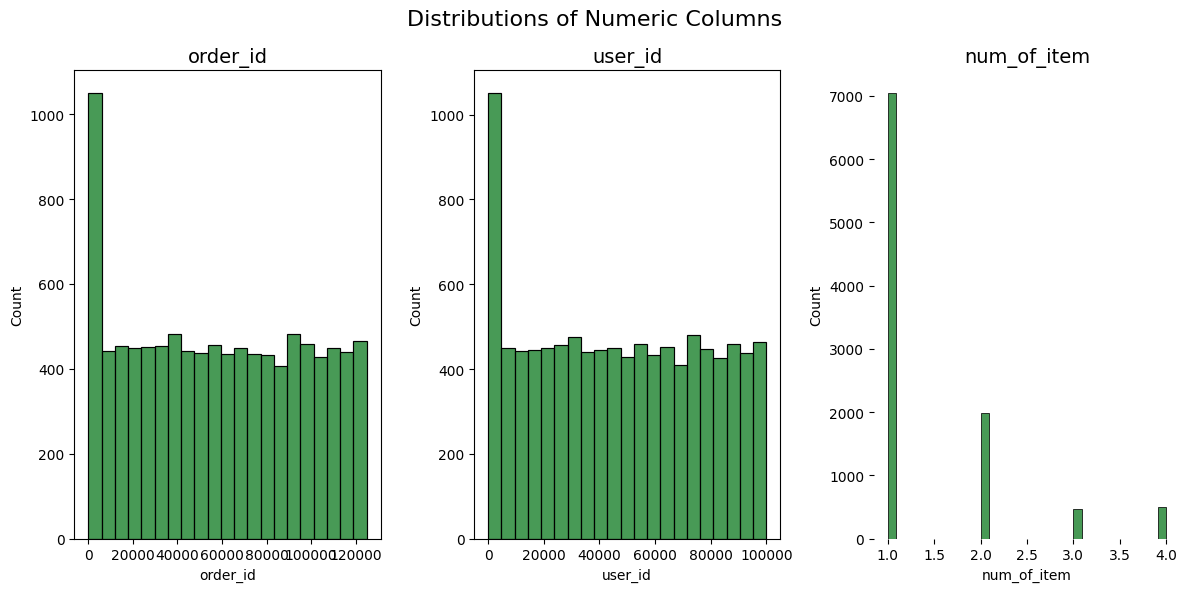

In [41]:
numCols = orders.select_dtypes(exclude='object').columns
numCols

fig = plt.figure(figsize=(12, 6))
fig.suptitle('Distributions of Numeric Columns', fontsize=16)

for i in range(len(numCols)):
  plt.subplot(1, 3, i+1)
  sns.histplot(x=orders[numCols[i]], color='#0b781e')
  variable = numCols[i]
  plt.title(variable, fontsize=14)


ax = plt.gca()
# print(id(plt.gca()) == id(ax))


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show();

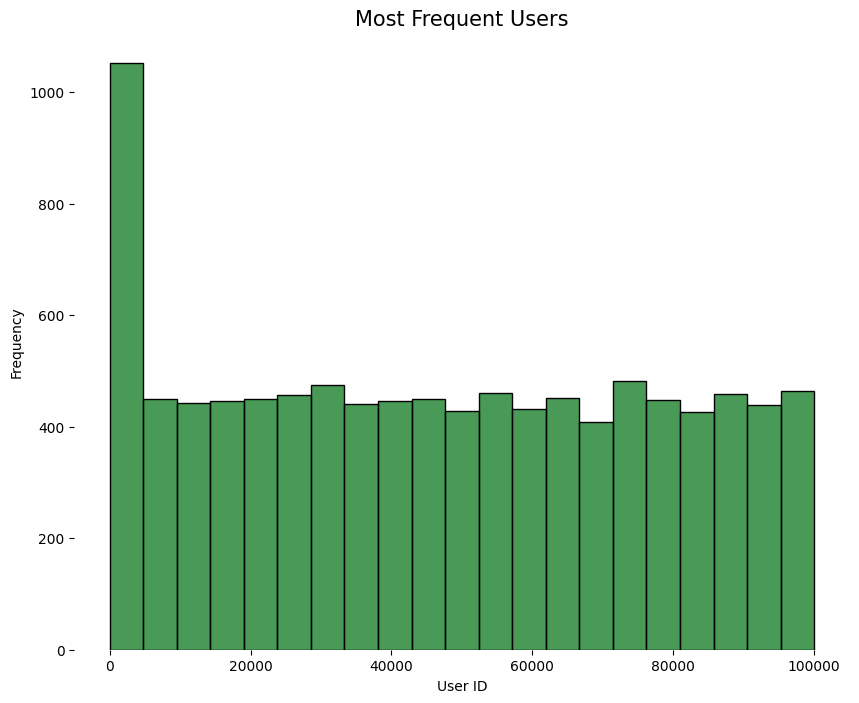

In [42]:
lfig = plt.figure(figsize=(10, 8))
sns.histplot(x=orders['user_id'], color='#0b781e' )

ax = plt.gca()
#print(plt.gca() == ax)

ax.set_title('Most Frequent Users', fontsize=15, fontweight=2)
ax.set_xlabel('User ID')
ax.set_ylabel('Frequency')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show();